Following along with the IBM Basics of Quantum Information course: https://learning.quantum.ibm.com/course/basics-of-quantum-information

Not providing a lot of commentary since most of this is review for me. Just following along as a refresher and to note any breaking changes from v1 to v2.

## Single Systems

Introduces basic matrix operations, displays, and plotting, along with Qiskit Statevectors, Operators, and Circuits.

In [ ]:
# Installed:
# python~=3.12.9
# qiskit~=2.0.0
# matplotlib~=3.10.3
# pylatexenc~=2.10

# Display all output in each cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np

from qiskit import __version__
print(__version__)
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram

2.0.0


In [2]:
ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [3]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
print(M1)
print(M2)
print(M1 / 2)
print(M2 / 2)
M = M1 / 2 + M2 / 2
print(M)

[[1 1]
 [0 0]]
[[1 0]
 [0 1]]
[[0.5 0.5]
 [0.  0. ]]
[[0.5 0. ]
 [0.  0.5]]
[[1.  0.5]
 [0.  0.5]]


In [4]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [5]:
display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])

display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [7]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])

display(v.draw("text"))
display(v.draw("latex"))
print(v.draw("latex_source"))

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

(\frac{1}{3} + \frac{2 i}{3}) |0\rangle- \frac{2}{3} |1\rangle


In [8]:
w = Statevector([1 / 3, 2 / 3])

display(w.draw("text"))
display(w.draw("latex"))
print(w.draw("latex_source"))

[0.33333333+0.j,0.66666667+0.j]

<IPython.core.display.Latex object>

\frac{1}{3} |0\rangle+\frac{2}{3} |1\rangle


In [9]:
# Is Euclidean norm 1? (Point in Bloch sphere.)
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [10]:
display(v.draw("latex"))

outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))
display(state.draw("text"))

<IPython.core.display.Latex object>

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

[ 0.+0.j,-1.+0.j]

In [11]:
display(v.draw("latex"))

outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))
display(state.draw("text"))

<IPython.core.display.Latex object>

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

[ 0.+0.j,-1.+0.j]

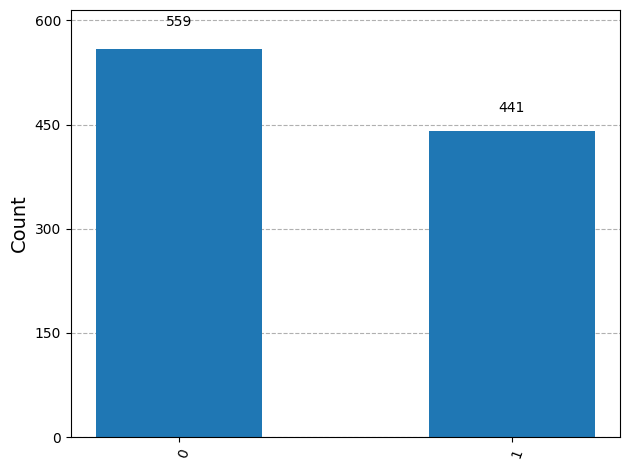

In [12]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [13]:
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

display(Y.draw("latex"))
display(H.draw("latex"))
display(S.draw("latex"))
display(T.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
v = Statevector([1, 0])
v.draw("latex")

v = v.evolve(H)
v.draw("latex")
v = v.evolve(T)
v.draw("latex")
v = v.evolve(H)
v.draw("latex")
v = v.evolve(S)
v.draw("latex")
v = v.evolve(Y)
v.draw("latex")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

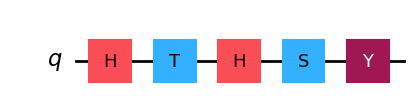

In [22]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

circuit.draw(output="mpl")

In [23]:
Operator.from_circuit(circuit).draw("latex")

<IPython.core.display.Latex object>

In [24]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("latex")

<IPython.core.display.Latex object>

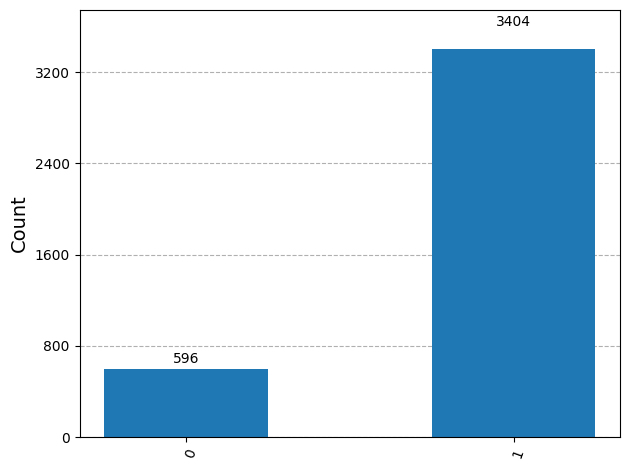

In [25]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)